# CIS 9: Final Project


## Introduction

Name: Iman Jabbarzadeh Gangeh <br> <br>
Description: This Jupyter Notebook uses data from the College Scorecard to analyze student outcomes in various postsecondary institutions. <br> 
The goal is to discover what factors contribute the most to a low completion rate (less than 50% graduation rate for full-time students within 6 years) <br> and also to be able to predict whether a university will have a high or low completion rate. <br><br>
Input Data: csv file containing information from surveyed colleges accessed from kaggle  <br><br>
Why: As a current college student, and as someone who is interested in academia as a whole I was interested in datasets related to schools or colleges. Academic institutions provide opportunities to their prospective students, and analyzing factors to lead to better outcomes can help universities target those factors, and improving their systems. The dataset was also well documented, large, and is taken from real life studies, factors that set it apart from many of the other new datasets uploaded to kaggle. 

## Background

Source: https://www.kaggle.com/datasets/adilshamim8/college-scorecard

## Analysis

0. Import modules

In [238]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics
from sklearn.metrics import f1_score


1. Read data from file 'college_scorecard.csv' into a DataFrame <br>
   Then print the __number of rows, columns and the first few rows__

In [239]:
cd = pd.read_csv('college_scorecard.csv')
print("(rows, columns):", cd.shape)
cd.head()

(rows, columns): (124699, 119)


,Predominant_degree_awarded__recoded_0s_and_4s,Number_of_branch_campuses,Degree_of_urbanization_of_institution,Admission_rate,Admission_rate_for_all_campuses_rolled_up_to_the_6_digi,Midpoint_of_SAT_scores_at_the_institution__critical_rea,Midpoint_of_SAT_scores_at_the_institution__math,Midpoint_of_SAT_scores_at_the_institution__writing,Midpoint_of_the_ACT_cumulative_score,Midpoint_of_the_ACT_English_score,...,Accreditor_for_institution,Flag_for_main_campus,Highest_degree_awarded,Control_of_institution,Region__IPEDS,Locale_of_institution,Carnegie_Classification____size_and_setting,Flag_for_Historically_Black_College_and_University,Flag_for_distance_education_only_education,Completion_rate_for_first_time_full_time_target
0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,89.0,1.0,'Associate degree',0.0,2.0,12.0,18.0,2.0,2.0,0
1,1.0,0.0,-1.0,67.0,68.0,-1.0,-1.0,-1.0,7.0,8.0,...,89.0,0.0,'Bachelor\'s degree',1.0,7.0,12.0,18.0,2.0,2.0,0
2,1.0,0.0,-1.0,22.0,21.0,23.0,21.0,-1.0,5.0,-1.0,...,89.0,0.0,'Bachelor\'s degree',1.0,7.0,12.0,18.0,2.0,2.0,0
3,1.0,0.0,-1.0,61.0,62.0,-1.0,-1.0,-1.0,6.0,6.0,...,89.0,0.0,'Certificate degree',1.0,8.0,12.0,18.0,2.0,2.0,0
4,1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,89.0,0.0,Non-degree-granting,0.0,2.0,12.0,18.0,2.0,2.0,0


2. Remove additional spaces from columns so that they are easily accessible <br>
Then output the columns to make sure. 

In [240]:
cd.columns = cd.columns.str.strip()
# cd.columns = cd.columns.str.extract(r'(\w+)', expand=False) 
cd.columns

Index(['Predominant_degree_awarded__recoded_0s_and_4s',
       'Number_of_branch_campuses', 'Degree_of_urbanization_of_institution',
       'Admission_rate',
       'Admission_rate_for_all_campuses_rolled_up_to_the_6_digi',
       'Midpoint_of_SAT_scores_at_the_institution__critical_rea',
       'Midpoint_of_SAT_scores_at_the_institution__math',
       'Midpoint_of_SAT_scores_at_the_institution__writing',
       'Midpoint_of_the_ACT_cumulative_score',
       'Midpoint_of_the_ACT_English_score',
       ...
       'Accreditor_for_institution', 'Flag_for_main_campus',
       'Highest_degree_awarded', 'Control_of_institution', 'Region__IPEDS',
       'Locale_of_institution', 'Carnegie_Classification____size_and_setting',
       'Flag_for_Historically_Black_College_and_University',
       'Flag_for_distance_education_only_education',
       'Completion_rate_for_first_time_full_time_target'],
      dtype='object', length=119)

3a. Check the types of all the columns to make sure they're all numbers

In [241]:
cd.dtypes.value_counts()

float64    117
object       1
int64        1
Name: count, dtype: int64

3b. Since one of the rows is a str we need to convert the data to integers <br>
__Identify the column to be transformed.__ 
__Find the unique values in column.__

In [242]:
dtypes = cd.dtypes
# for i in range(len(dtypes)): 
#     if dtypes.iloc[i] == 'object':
#         print(dtypes.index[i])

for i, dtype in enumerate(dtypes):
    if dtype =='object':
        to_replace = dtypes.index[i] # since only one column is an object
print("Column to be transformed:", to_replace, end='\n\n')
unique_vals = cd[to_replace].unique()
print("Unique values in column:", unique_vals, end='\n\n')


Column to be transformed: Highest_degree_awarded

Unique values in column: ["'Associate degree'" "'Bachelor\\'s degree'" "'Certificate degree'"
 'Non-degree-granting' "'Graduate degree'"]



3c. Create a dictionary to replace the values in column with ints <br>
__Print the new unique values in the column__ <br>
Convert all the values in dataframe to ints then __print the counts of each unique value in dataframe__

In [243]:
replace_dict = {}
for i, unique_val in enumerate(unique_vals): 
    replace_dict[unique_val] = str(i)

cd[to_replace] = cd[to_replace].replace(replace_dict)
cd = cd.astype(int) # can only do this since even the float values in the dataframe didn't actually hold any decimal values
print("Unique values in Highest_Degree_Awarded column:", cd[to_replace].unique(), end='\n\n')
cd.dtypes.value_counts()


Unique values in Highest_Degree_Awarded column: [0 1 2 3 4]



int32    119
Name: count, dtype: int64

4. Show the counts of universities that either met the target (1) or didn't (0)

In [244]:
cd['Completion_rate_for_first_time_full_time_target'].value_counts()

Completion_rate_for_first_time_full_time_target
0    108794
1     15905
Name: count, dtype: int64

5. Split the universities into two dataframes, one holding all the universities that didn't meet the target (0) and ones that did (1) <br>
Then __print the first five rows of each.__

In [245]:
cd0 = cd[cd['Completion_rate_for_first_time_full_time_target'] == 0]
cd1 = cd[cd['Completion_rate_for_first_time_full_time_target'] == 1]
display(cd0.head())
cd1.head()

,Predominant_degree_awarded__recoded_0s_and_4s,Number_of_branch_campuses,Degree_of_urbanization_of_institution,Admission_rate,Admission_rate_for_all_campuses_rolled_up_to_the_6_digi,Midpoint_of_SAT_scores_at_the_institution__critical_rea,Midpoint_of_SAT_scores_at_the_institution__math,Midpoint_of_SAT_scores_at_the_institution__writing,Midpoint_of_the_ACT_cumulative_score,Midpoint_of_the_ACT_English_score,...,Accreditor_for_institution,Flag_for_main_campus,Highest_degree_awarded,Control_of_institution,Region__IPEDS,Locale_of_institution,Carnegie_Classification____size_and_setting,Flag_for_Historically_Black_College_and_University,Flag_for_distance_education_only_education,Completion_rate_for_first_time_full_time_target
0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,...,89,1,0,0,2,12,18,2,2,0
1,1,0,-1,67,68,-1,-1,-1,7,8,...,89,0,1,1,7,12,18,2,2,0
2,1,0,-1,22,21,23,21,-1,5,-1,...,89,0,1,1,7,12,18,2,2,0
3,1,0,-1,61,62,-1,-1,-1,6,6,...,89,0,2,1,8,12,18,2,2,0
4,1,0,-1,-1,-1,-1,-1,-1,-1,-1,...,89,0,3,0,2,12,18,2,2,0


,Predominant_degree_awarded__recoded_0s_and_4s,Number_of_branch_campuses,Degree_of_urbanization_of_institution,Admission_rate,Admission_rate_for_all_campuses_rolled_up_to_the_6_digi,Midpoint_of_SAT_scores_at_the_institution__critical_rea,Midpoint_of_SAT_scores_at_the_institution__math,Midpoint_of_SAT_scores_at_the_institution__writing,Midpoint_of_the_ACT_cumulative_score,Midpoint_of_the_ACT_English_score,...,Accreditor_for_institution,Flag_for_main_campus,Highest_degree_awarded,Control_of_institution,Region__IPEDS,Locale_of_institution,Carnegie_Classification____size_and_setting,Flag_for_Historically_Black_College_and_University,Flag_for_distance_education_only_education,Completion_rate_for_first_time_full_time_target
5,1,0,-1,44,43,48,55,-1,14,15,...,89,0,1,2,1,12,18,2,2,1
24,1,0,-1,14,13,26,26,-1,7,8,...,89,0,1,2,2,12,18,2,2,1
31,1,0,-1,69,70,35,28,-1,9,10,...,89,0,1,1,6,12,18,2,2,1
34,1,0,-1,-1,-1,-1,-1,-1,-1,-1,...,89,0,1,1,6,12,18,2,2,1
36,1,0,-1,-1,-1,-1,-1,-1,-1,-1,...,89,0,1,1,2,12,18,2,2,1


6. Randomly Select 5000 entries from each and combine to create a new balanced dataset to use for training <br>
__Print the counts of 0 and 1 values in completion column and check that they are equal__
__Print the shape and first few rows of this new dataframe.__

In [246]:
temp0 = cd0.sample(5000, replace=False)
temp1 = cd1.sample(5000, replace=False)
cd_train = pd.concat([temp0,temp1], ignore_index=True,sort=False)
print(cd_train['Completion_rate_for_first_time_full_time_target'].value_counts())
print(cd_train.shape)
cd_train.head()

Completion_rate_for_first_time_full_time_target
0    5000
1    5000
Name: count, dtype: int64
(10000, 119)


,Predominant_degree_awarded__recoded_0s_and_4s,Number_of_branch_campuses,Degree_of_urbanization_of_institution,Admission_rate,Admission_rate_for_all_campuses_rolled_up_to_the_6_digi,Midpoint_of_SAT_scores_at_the_institution__critical_rea,Midpoint_of_SAT_scores_at_the_institution__math,Midpoint_of_SAT_scores_at_the_institution__writing,Midpoint_of_the_ACT_cumulative_score,Midpoint_of_the_ACT_English_score,...,Accreditor_for_institution,Flag_for_main_campus,Highest_degree_awarded,Control_of_institution,Region__IPEDS,Locale_of_institution,Carnegie_Classification____size_and_setting,Flag_for_Historically_Black_College_and_University,Flag_for_distance_education_only_education,Completion_rate_for_first_time_full_time_target
0,-1,5,-1,-1,50,-1,-1,-1,-1,-1,...,89,1,3,2,1,9,9,0,1,0
1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,...,89,0,3,2,5,12,18,2,1,0
2,0,1,-1,-1,-1,-1,-1,-1,-1,-1,...,89,0,0,0,4,12,18,2,1,0
3,0,0,-1,-1,-1,-1,-1,-1,-1,-1,...,89,0,3,2,8,12,18,2,2,0
4,1,1,-1,-1,45,-1,-1,-1,-1,-1,...,89,1,1,1,0,12,18,2,2,0


7. Shuffle the dataframe to make sure indexes are random <br>
__Print the first and last 5 rows in the dataframe__

In [247]:
cd_train = cd_train.sample(frac=1).reset_index(drop=True)
display(cd_train.head())
cd_train.tail()

,Predominant_degree_awarded__recoded_0s_and_4s,Number_of_branch_campuses,Degree_of_urbanization_of_institution,Admission_rate,Admission_rate_for_all_campuses_rolled_up_to_the_6_digi,Midpoint_of_SAT_scores_at_the_institution__critical_rea,Midpoint_of_SAT_scores_at_the_institution__math,Midpoint_of_SAT_scores_at_the_institution__writing,Midpoint_of_the_ACT_cumulative_score,Midpoint_of_the_ACT_English_score,...,Accreditor_for_institution,Flag_for_main_campus,Highest_degree_awarded,Control_of_institution,Region__IPEDS,Locale_of_institution,Carnegie_Classification____size_and_setting,Flag_for_Historically_Black_College_and_University,Flag_for_distance_education_only_education,Completion_rate_for_first_time_full_time_target
0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,...,89,0,3,2,7,12,18,2,2,0
1,0,0,-1,-1,-1,-1,-1,-1,-1,-1,...,89,0,2,1,1,12,18,2,1,0
2,0,0,-1,-1,-1,-1,-1,-1,-1,-1,...,89,0,0,0,2,12,18,2,2,0
3,0,1,-1,-1,-1,-1,-1,-1,-1,-1,...,89,1,0,0,8,12,18,2,2,0
4,1,1,-1,27,16,-1,-1,-1,-1,-1,...,89,0,2,0,6,12,18,2,2,1


,Predominant_degree_awarded__recoded_0s_and_4s,Number_of_branch_campuses,Degree_of_urbanization_of_institution,Admission_rate,Admission_rate_for_all_campuses_rolled_up_to_the_6_digi,Midpoint_of_SAT_scores_at_the_institution__critical_rea,Midpoint_of_SAT_scores_at_the_institution__math,Midpoint_of_SAT_scores_at_the_institution__writing,Midpoint_of_the_ACT_cumulative_score,Midpoint_of_the_ACT_English_score,...,Accreditor_for_institution,Flag_for_main_campus,Highest_degree_awarded,Control_of_institution,Region__IPEDS,Locale_of_institution,Carnegie_Classification____size_and_setting,Flag_for_Historically_Black_College_and_University,Flag_for_distance_education_only_education,Completion_rate_for_first_time_full_time_target
9995,1,0,-1,-1,-1,-1,-1,-1,-1,-1,...,89,0,2,1,5,12,18,2,2,0
9996,1,3,-1,60,61,49,39,-1,10,11,...,89,0,1,1,5,12,18,2,2,1
9997,0,5,-1,-1,-1,-1,-1,-1,-1,-1,...,89,0,2,0,8,12,18,2,2,1
9998,1,0,-1,7,6,-1,-1,-1,-1,-1,...,89,0,1,1,7,12,18,2,1,1
9999,0,4,-1,-1,-1,-1,-1,-1,-1,-1,...,89,1,3,0,6,12,18,2,2,0


8. Check for any NaNs in the columns. <br>
__Print the number of NaN's in each column.__ <br>
__Print the total number of NaN's.__

In [248]:
print(cd_train.isna().sum(), end='\n\n')
print("Total number of NaNs:",  cd_train.isna().sum().sum())

Predominant_degree_awarded__recoded_0s_and_4s              0
Number_of_branch_campuses                                  0
Degree_of_urbanization_of_institution                      0
Admission_rate                                             0
Admission_rate_for_all_campuses_rolled_up_to_the_6_digi    0
                                                          ..
Locale_of_institution                                      0
Carnegie_Classification____size_and_setting                0
Flag_for_Historically_Black_College_and_University         0
Flag_for_distance_education_only_education                 0
Completion_rate_for_first_time_full_time_target            0
Length: 119, dtype: int64

Total number of NaNs: 0


9. Create the X and y datasets and __show the number of rows and columns of each__

In [249]:
# plt.figure(figsize=(60,120))
# plt.subplots_adjust(hspace=0.3, wspace=0.3)
# for i in range(119):
#     plt.subplot(17,7,i+1)
#     plt.title(cd_train.columns[i])
#     plt.hist(cd_train[cd_train.columns[i]])
#     plt.grid()
X = cd_train.drop(columns='Completion_rate_for_first_time_full_time_target')
print("(rows, columns) of X dataset:", X.shape)
y = cd_train['Completion_rate_for_first_time_full_time_target']
print("(rows, columns) of y dataset:", y.shape)


(rows, columns) of X dataset: (10000, 118)
(rows, columns) of y dataset: (10000,)


10. Create training and testing sets and __show their dimensions__

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print("All values are formatted (rows, columns):", "\nTraining features shape:", X_train.shape, "\nTraining labels shape:", y_train.shape, 
      "\nTesting features shape:", X_test.shape, "\nTesting labels shape:", y_test.shape)

All values are formatted (rows, columns): 
Training features shape: (7500, 118) 
Training labels shape: (7500,) 
Testing features shape: (2500, 118) 
Testing labels shape: (2500,)


11. Train and measure accuracy of various ML models <br>
__Select the most effective model to use in next few steps__

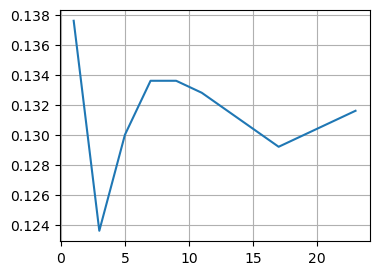

In [261]:
errors = []
for i in np.arange(1,25, 2): 
    c = KNeighborsClassifier(n_neighbors = i)
    c.fit(X_train, y_train)
    y_pred = c.predict(X_test)
    errors.append(np.mean(y_pred != y_test))

plt.figure(figsize=(4,3))
plt.grid()
plt.plot(np.arange(1,25,2), errors)

In [262]:
classifiers = [
    KNeighborsClassifier(3),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier()
    ]

for classifier in classifiers: 
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print(classifier)
    print(f'f1 score: {f1_score(y_test, y_pred, average='weighted'):.3f}')
    print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred):.3f}')
    print(metrics.confusion_matrix(y_test, y_pred, labels=np.arange(2)), end='\n\n')
    

KNeighborsClassifier(n_neighbors=3)
f1 score: 0.876
Accuracy: 0.876
[[1066  185]
 [ 124 1125]]

GaussianNB()
f1 score: 0.849
Accuracy: 0.849
[[1080  171]
 [ 207 1042]]

DecisionTreeClassifier()
f1 score: 0.875
Accuracy: 0.875
[[1096  155]
 [ 157 1092]]

RandomForestClassifier()
f1 score: 0.908
Accuracy: 0.908
[[1122  129]
 [ 101 1148]]



12. __Print classifier__ to make sure its set to the RandomForestClassifier <br>
__Display the first fives rows of feature importances__ of the RandomForestClassifier.

In [263]:
print(classifier)
features = pd.DataFrame(classifier.feature_importances_, X.columns, columns=['Importance'])
features.head()

RandomForestClassifier()


,Importance
Predominant_degree_awarded__recoded_0s_and_4s,0.012888
Number_of_branch_campuses,0.007710
Degree_of_urbanization_of_institution,0.000000
Admission_rate,0.020303
Admission_rate_for_all_campuses_rolled_up_to_the_6_digi,0.020352


13. Sort the features based on importance. <br>
__Display the first 10 rows.__

In [264]:
features_sorted = features.sort_values(by='Importance', ascending=False)
features_sorted.head(10)

,Importance
Out_of_state_tuition_and_fees,0.061902
Percentage_of_degrees_awarded_in_Biological_And_Biomedi,0.051510
Highest_degree_awarded,0.046530
In_state_tuition_and_fees,0.041471
Percentage_of_degrees_awarded_in_History,0.041306
Net_tuition_revenue_per_full_time_equivalent_student,0.030778
Midpoint_of_SAT_scores_at_the_institution__critical_rea,0.030728
Percentage_of_degrees_awarded_in_Social_Sciences,0.029780
Percentage_of_degrees_awarded_in_Psychology,0.026232
Instructional_expenditures_per_full_time_equivalent_stu,0.025613


14. Use the first 50 features sorted by importance to create a new X dataset <br>
__Print the shape of the new dataframe.__

In [271]:
X = cd_train[features_sorted.index[:50]]
X.shape

(10000, 50)

15. Create training and testing sets and __show their dimensions__

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) # using same seed as before to reduce 
                                                                                          # confounding variables in testing
print("All values are formatted (rows, columns):", "\nTraining features shape:", X_train.shape, "\nTraining labels shape:", y_train.shape, 
      "\nTesting features shape:", X_test.shape, "\nTesting labels shape:", y_test.shape)

All values are formatted (rows, columns): 
Training features shape: (7500, 50) 
Training labels shape: (7500,) 
Testing features shape: (2500, 50) 
Testing labels shape: (2500,)


16. Train and measure accuracy of the RandomForestClassifier() using this new dataset 

In [292]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classifier)
print(f'f1 score: {f1_score(y_test, y_pred, average='weighted'):.3f}')
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred):.3f}')
print(metrics.confusion_matrix(y_test, y_pred, labels=np.arange(2)), end='\n\n')

RandomForestClassifier()
f1 score: 0.914
Accuracy: 0.914
[[1125  126]
 [  89 1160]]



17. Iterate through using different number of features to train the model and __plot accuracy scores__ based on the original feature importances to find the optimal number of features. 

In [288]:
accuracy = []
for i in np.arange(1,100): 
    X = cd_train[features_sorted.index[:i]]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
    classifier = RandomForestClassifier()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy.append(round(metrics.accuracy_score(y_test, y_pred),3))
print('training complete')

training complete


Maximum accuracy score achieved: 0.916
Number of features that produced greatest accuracy: 38


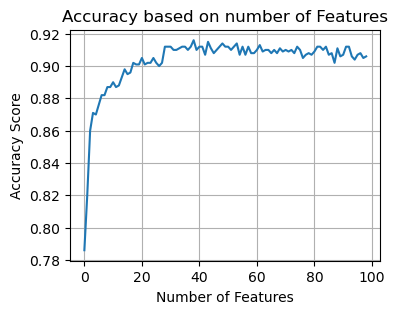

In [293]:
plt.figure(figsize=(4,3))
plt.grid()
plt.title('Accuracy based on number of Features')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy Score')
plt.plot(accuracy)

print("Maximum accuracy score achieved:", max(accuracy))
print("Number of features that produced greatest accuracy:", accuracy.index(max(accuracy)))

19. Create a testing set using a sample of 2500 from the original dataframe cd <br>
__Print the shape of the new testing dataframe and the count of unique values__ in the 'Completion_rate_for_first_time_full_time_target' column

In [296]:
cd_test = cd.sample(2500)
print("(rows, columns):", cd_test.shape)
cd_test['Completion_rate_for_first_time_full_time_target'].value_counts()

(rows, columns): (2500, 119)


Completion_rate_for_first_time_full_time_target
0    2201
1     299
Name: count, dtype: int64

20. Retrain the models with 38 features and 118 features to be used for testing <br>
__Print X shape__

In [303]:
X38 = cd_train[features_sorted.index[:38]]
print("X38 (rows, columns):", X38.shape)
X_train, X_test, y_train, y_test = train_test_split(X38, y, test_size=0.25, random_state=1)
print('X38 training set (rows,columns):', X_train.shape)
classifier38 = RandomForestClassifier()
classifier38.fit(X_train, y_train)

X118 = cd_train.drop(columns='Completion_rate_for_first_time_full_time_target')
print("X118 (rows, columns):", X118.shape)
X_train, X_test, y_train, y_test = train_test_split(X118, y, test_size=0.25, random_state=1)
print('X118 training set (rows,columns):', X_train.shape)
classifier118 = RandomForestClassifier()

classifier118.fit(X_train, y_train)

print('training complete')

X38 (rows, columns): (10000, 38)
X38 training set (rows,columns): (7500, 38)
X118 (rows, columns): (10000, 118)
X118 training set (rows,columns): (7500, 118)
training complete


21. Create two sets of X_test, and one y_test one with 38 features the other with 118 features. <br>
__Print the shape of each.__

22. Test the models with the imbalanced datasets <br>
__Print the Accuracy measurements of each__

In [306]:
y_pred38 = classifier38.predict(X_test38)
print(f'f1 score: {f1_score(y_test, y_pred38, average='weighted'):.3f}')
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred38):.3f}')
print(metrics.confusion_matrix(y_test, y_pred38, labels=np.arange(2)), end='\n\n')

y_pred118 = classifier118.predict(X_test118)
print(f'f1 score: {f1_score(y_test, y_pred118, average='weighted'):.3f}')
print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred118):.3f}')
print(metrics.confusion_matrix(y_test, y_pred118, labels=np.arange(2)), end='\n\n')

f1 score: 0.913
Accuracy: 0.903
[[1981  220]
 [  22  277]]

f1 score: 0.911
Accuracy: 0.901
[[1971  230]
 [  18  281]]



23. Analyze the features that seemed most important to the random forest classification.

In [308]:
features_sorted.head(38)

,Importance
Out_of_state_tuition_and_fees,0.061902
Percentage_of_degrees_awarded_in_Biological_And_Biomedi,0.051510
Highest_degree_awarded,0.046530
In_state_tuition_and_fees,0.041471
Percentage_of_degrees_awarded_in_History,0.041306
Net_tuition_revenue_per_full_time_equivalent_student,0.030778
Midpoint_of_SAT_scores_at_the_institution__critical_rea,0.030728
Percentage_of_degrees_awarded_in_Social_Sciences,0.029780
Percentage_of_degrees_awarded_in_Psychology,0.026232
Instructional_expenditures_per_full_time_equivalent_stu,0.025613
